# MY CAPSTONE PROJECT


In [11]:
%cd /content/drive/MyDrive/mycapstoneproject1


/content/drive/MyDrive/mycapstoneproject1


In [12]:
%cd /content/drive/MyDrive/mycapstoneproject1/archive

[Errno 2] No such file or directory: '/content/drive/MyDrive/mycapstoneproject1/archive'
/content/drive/MyDrive/mycapstoneproject1


# LIST OF DATASETS

In [13]:
!ls


starbucks


In [14]:
# supressing thr warning messages
import warnings
warnings.filterwarnings("ignore")

# READING THE DATASETS

In [15]:
import pandas as pd

# Reading the dataset
starbucksdata = pd.read_csv('/content/drive/MyDrive/mycapstoneproject1/starbucks/D1/SBUX.US_D1.csv', encoding='latin')
print('Shape before deleting duplicate values:', starbucksdata.shape)

# Removing duplicate rows if any
starbucksdata = starbucksdata.drop_duplicates()
print('Shape after deleting duplicate values:', starbucksdata.shape)

# Print sample data
starbucksdata.head(10)
# head(10) means how many samples you want

Shape before deleting duplicate values: (6639, 6)
Shape after deleting duplicate values: (6639, 6)


,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105
5,1998-01-09,35.75,36.01,34.37,35.13,713703
6,1998-01-12,34.50,35.37,34.25,35.19,855603
7,1998-01-13,35.38,35.63,35.00,35.56,460200
8,1998-01-14,35.63,35.63,35.07,35.19,336200
9,1998-01-15,35.13,35.26,33.75,34.00,742700




# PROBLEM DEFINITION


*  create a prediction of Starbucks stock price based on historical data


*   Identify the target variable, which in this case is likely the closing price of the stock.















In [16]:
target_variable = starbucksdata['close']

# CHOOSING THE APPROPRIATE ML/AL ALGORITHM FOR DATA ANALYSIS

*   based on problem statement we need to create a supervised ML regression model as the target value is continus






<Axes: >

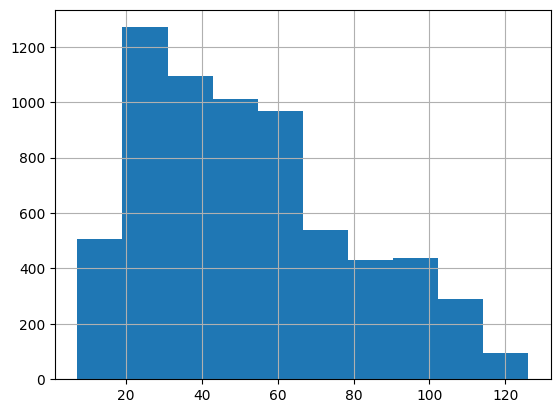

In [17]:
%matplotlib inline
starbucksdata['close'].hist()
#using the method called histogram

the data distribution of the target variable is satisfactory to proceed further.






# BASIC EXPLORATORY DATA ANALYSIS

this step is performed to guide the overall data
to look each column data clearly wheather it appect the target varaible or not.

head()
this helps to see a few sample rows of the data
info()
 this provides the summaried information of data
describe() this provides the descriptive statistical details of the data
nunique()
this helps us to identify if a column is categorical or continuous.

In [18]:
# looking at sample rows in the data
starbucksdata.head()


,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105


In [19]:
#looking at sample rows in the data
starbucksdata.tail()

,datetime,open,high,low,close,volume
6634,2024-03-08,90.95,91.53,90.60,91.07,5115057
6635,2024-03-09,91.06,91.09,91.05,91.05,4882
6636,2024-03-11,91.26,92.96,91.17,92.07,3796900
6637,2024-03-12,92.00,92.72,91.21,92.42,6207319
6638,2024-03-13,92.55,92.87,90.87,91.59,4772185


In [ ]:
#observing the summarized information of data
#data types missing value based on number of non null values vs total rows etc
#romove those variables from data which have too many missing values
#remove qualitaive variables which can not be used in machine learning
starbucksdata.info

In [ ]:
#looking at the descriptive statistics of the data
starbucksdata.describe(include= 'all')


In [ ]:
#finding unique values for each column
#to understand which column is categorical and which is continous
starbucksdata.nunique()


# IDENTIFYING AND REJECTING USELESS COLUMNS


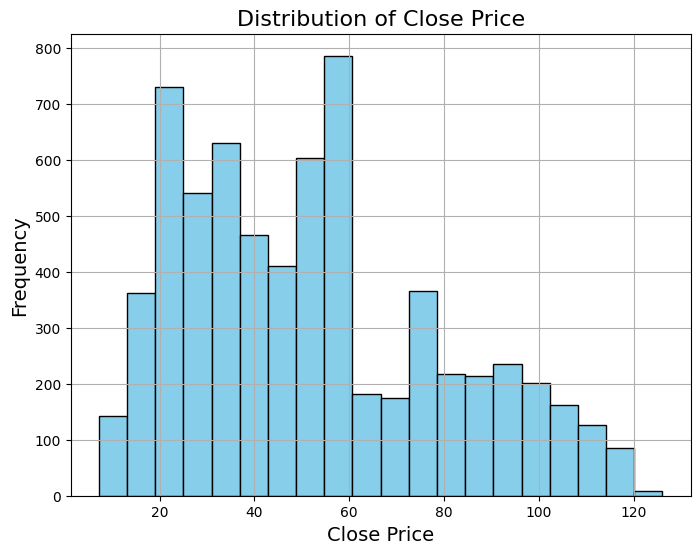

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(starbucksdata['close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Close Price', fontsize=16)
plt.grid(True)
plt.show()
# Drop irrelevant columns
# starbucks_data = starbucks_data.drop(columns=['column_name'])



# VISUAL EXPLORATORY DATA ANALYSIS OF DATA WITH HISTOGRAM AND BARCHARTS

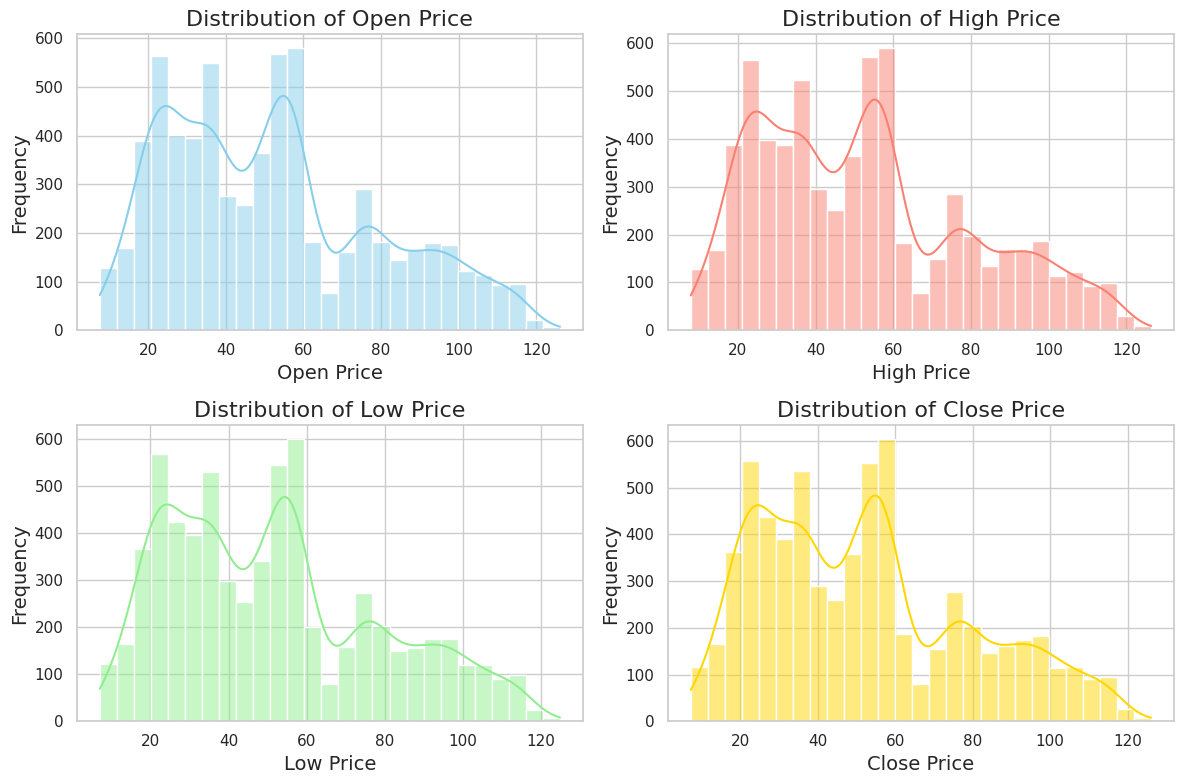

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for 'open', 'high', 'low', and 'close' prices
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(starbucksdata['open'], color='skyblue', kde=True)
plt.xlabel('Open Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Open Price', fontsize=16)

plt.subplot(2, 2, 2)
sns.histplot(starbucksdata['high'], color='salmon', kde=True)
plt.xlabel('High Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of High Price', fontsize=16)

plt.subplot(2, 2, 3)
sns.histplot(starbucksdata['low'], color='lightgreen', kde=True)
plt.xlabel('Low Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Low Price', fontsize=16)

plt.subplot(2, 2, 4)
sns.histplot(starbucksdata['close'], color='gold', kde=True)
plt.xlabel('Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Close Price', fontsize=16)

plt.tight_layout()
plt.show()



MISSING VALUES

In [18]:
missing_values = starbucksdata.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


REMOVING OUTLIERS

In [21]:
# Step 2: Remove outliers
# Define a function to remove outliers using z-score
def remove_outliers_zscore(df, threshold=3):
    z_scores = (df - df.mean()) / df.std()
    return df[(z_scores.abs() < threshold).all(axis=1)]

# Remove outliers from numeric columns
numeric_cols = ['open', 'high', 'low', 'close', 'volume']
starbucksdata_no_outliers = remove_outliers_zscore(starbucksdata[numeric_cols])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset (without outliers):")
print(starbucksdata_no_outliers)

# Optional: Save the cleaned dataset to a new CSV file

Cleaned Dataset (without outliers):
       open   high    low  close   volume
0     38.38  38.63  37.31  37.50   594000
1     37.63  37.78  36.75  37.13   644000
2     37.13  37.38  35.56  35.63  1183300
3     35.50  36.44  34.25  34.69  2039005
4     34.56  36.01  34.00  35.76  1638105
...     ...    ...    ...    ...      ...
6634  90.95  91.53  90.60  91.07  5115057
6635  91.06  91.09  91.05  91.05     4882
6636  91.26  92.96  91.17  92.07  3796900
6637  92.00  92.72  91.21  92.42  6207319
6638  92.55  92.87  90.87  91.59  4772185

[6545 rows x 5 columns]


THE ABOVE DATASET IS CLEAN DATASET WITHOUT OUTLIERS.

# VISUAL AND STATISTIC CORRELATION ANALYSIS FOR SELECTION OF BEST FEATURES

1. RELATIONSHIP EXPLORATION : CONTINUOUS VS CONTINOUS - SCATTER CHARTS

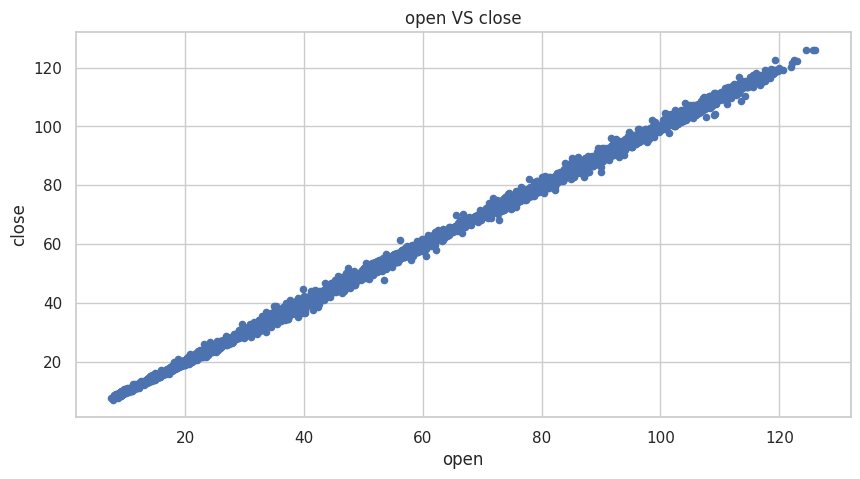

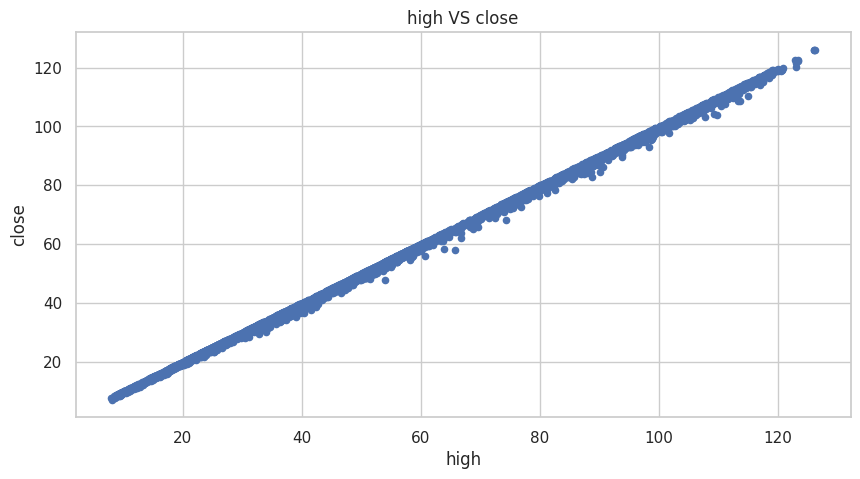

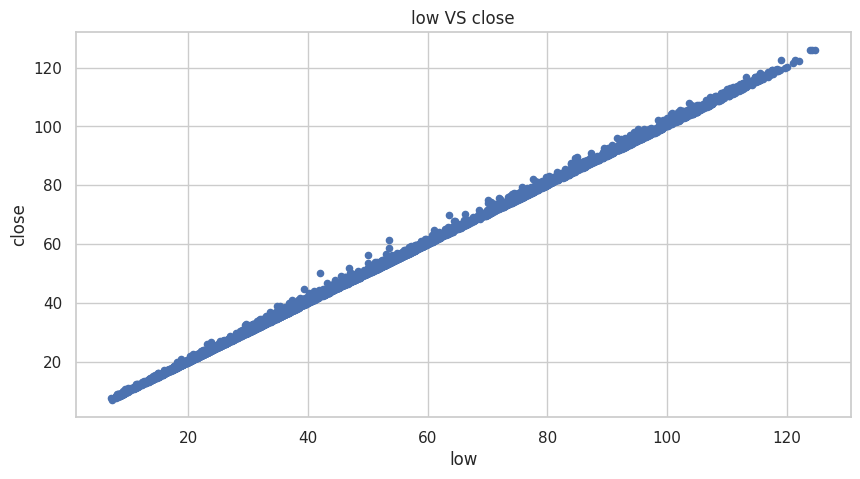

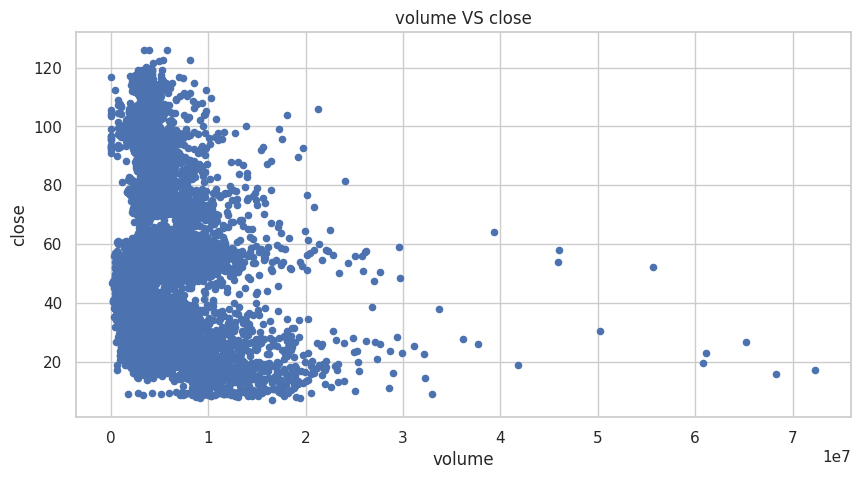

In [24]:
ContinuousCols=['open', 'high', 'low','volume']
for predictor in ContinuousCols:
    starbucksdata.plot.scatter(x=predictor, y='close', figsize=(10,5), title=predictor+" VS "+ 'close')


# STATISTICAL FEATURE SELECTION USING CORRELATION VALUE

In [25]:
 ContinuousCols = ['close','open', 'high', 'low','volume']
# Creating the correlation matrix
CorrelationData=starbucksdata[ContinuousCols].corr()
CorrelationData

,close,open,high,low,volume
close,1.000000,0.999524,0.999770,0.999762,-0.191477
open,0.999524,1.000000,0.999763,0.999742,-0.191927
high,0.999770,0.999763,1.000000,0.999640,-0.189593
low,0.999762,0.999742,0.999640,1.000000,-0.194200
volume,-0.191477,-0.191927,-0.189593,-0.194200,1.000000


In [26]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['close'][abs(CorrelationData['close']) > 0.5 ]

close    1.000000
open     0.999524
high     0.999770
low      0.999762
Name: close, dtype: float64

# STATISTICAL FEATURE SELECTION USING ANOVA TEST

In [27]:

		# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['open', 'high','low']
FunctionAnova(inpData=starbucksdata,
              TargetVariable='close',
              CategoricalPredictorList=CategoricalPredictorList)




##### ANOVA Results ##### 

open is correlated with close | P-Value: 0.0
high is correlated with close | P-Value: 0.0
low is correlated with close | P-Value: 0.0


['open', 'high', 'low']

# SELECTING FINAL PREDICTORS / FEATURES FOR BUILDING MACHINE LEARNING / AI MODEL

In [28]:
SelectedColumns=['open', 'high','low']
# Selecting final columns
DataForML=starbucksdata[SelectedColumns]
DataForML.head()

,open,high,low
0,38.38,38.63,37.31
1,37.63,37.78,36.75
2,37.13,37.38,35.56
3,35.50,36.44,34.25
4,34.56,36.01,34.00


In [29]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

DATA PRE-PROCESSING FOR MACHINE LEARNING MODEL BUILDING OR MODEL DEVELOPMENT

COVERTING THE NOMIAL VARIABLE TO NUMNERIC USING GET_DUMMIES()

In [30]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['close']=starbucksdata['close']
# Printing sample rows
DataForML_Numeric.head()

,open,high,low,close
0,38.38,38.63,37.31,37.50
1,37.63,37.78,36.75,37.13
2,37.13,37.38,35.56,35.63
3,35.50,36.44,34.25,34.69
4,34.56,36.01,34.00,35.76


# MACHINE LEARNING MODEL DEVELOPMENT

In [31]:
# Printing all the column names for our reference
print(DataForML_Numeric.columns)

# Separate Target Variable and Predictor Variables
TargetVariable = 'close'
Predictors = ['open', 'high', 'low']
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


Index(['open', 'high', 'low', 'close'], dtype='object')


# STANDARDLIZATION/ NORMALIZATION OF DATA

In [32]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4647, 3)
(4647,)
(1992, 3)
(1992,)


# MULTIPLE LINEAR REGRESSION ALOGRITHM FOR ML/AL MODEL BUILDING

In [33]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################

LinearRegression()
R2 Value: 0.9998140729775794


In [34]:
import numpy as np

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15            68.0
2  0.119686  0.117801  0.122887   21.78            22.0
3  0.249663  0.251224  0.252144   37.44            37.0
4  0.875843  0.876457  0.870998  110.73           110.0
Mean Accuracy on test data: 99.10676785622135
Median Accuracy on test data: 99.35956084172004

Accuracy values for 10-fold Cross Validation:
 [98.95198403 99.15691543 99.5142357  99.45834753 99.18057654 99.54186981
 99.6078107  99.67039986 99.52543805 99.55595336]

Final Average Accuracy of the model: 99.42


DECISION TREE REGRESSOR

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9982976725929282

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15            65.0
2  0.119686  0.117801  0.122887   21.78            21.0
3  0.249663  0.251224  0.252144   37.44            38.0
4  0.875843  0.876457  0.870998  110.73           113.0
Mean Accuracy on test data: 97.07271815048796
Median Accuracy on test data: 98.2291878689192

Accuracy values for 10-fold Cross Validation:
 [97.2189049  95.13873531 97.68583208 95.24226674 79.81379674 98.20476521
 98.66275864 98.15405802 98.27014902 98.11935119]

Final Average Accuracy of the model: 95.65


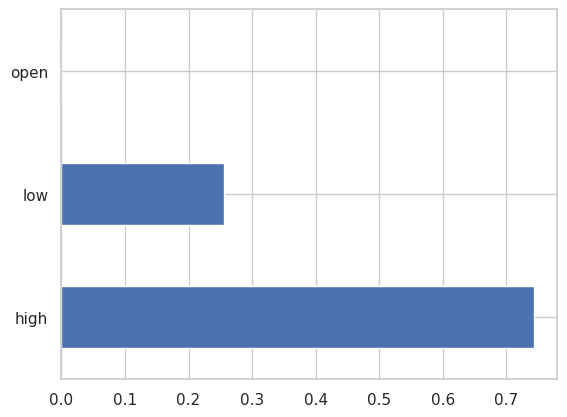

In [35]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20
# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

PLOTTING/ VISUALISING THE DECISION TREE

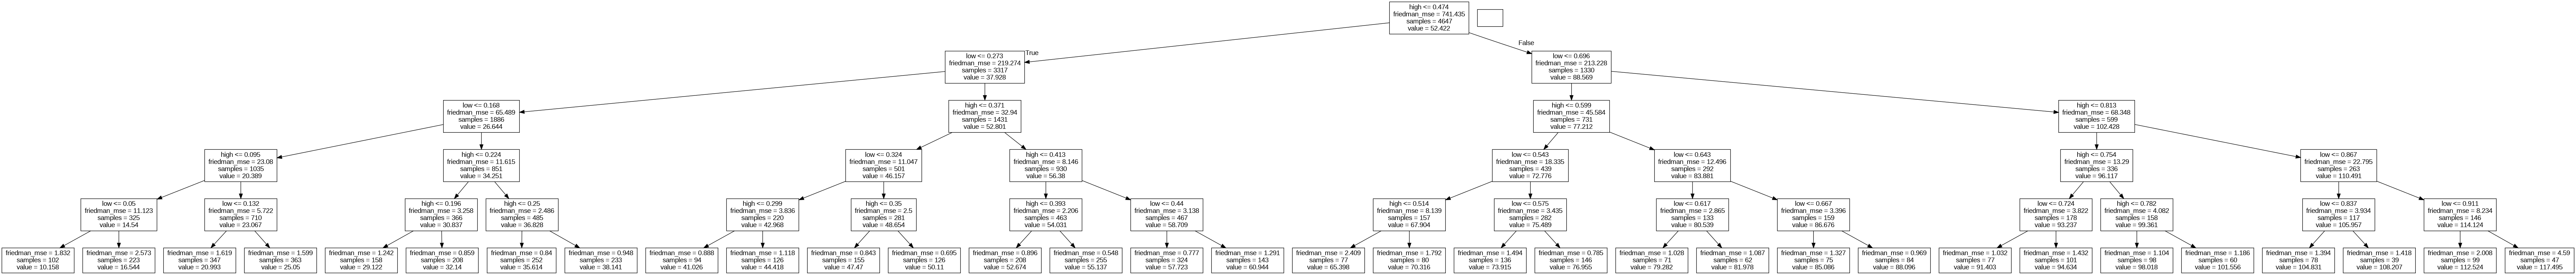

In [36]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)
# printing the rules
#print(dot_data)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

RANDOM FOREST REGRESSOR

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9961737430365775

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            48.0
1  0.502530  0.509289  0.509469   68.15            68.0
2  0.119686  0.117801  0.122887   21.78            23.0
3  0.249663  0.251224  0.252144   37.44            37.0
4  0.875843  0.876457  0.870998  110.73           113.0
Mean Accuracy on test data: 95.56954038905624
Median Accuracy on test data: 97.65713740863471

Accuracy values for 10-fold Cross Validation:
 [96.07347889 92.00332758 96.39992417 92.70441128 73.03975897 97.72049856
 97.97022715 97.57347283 97.47299182 97.33273902]

Final Average Accuracy of the model: 93.83


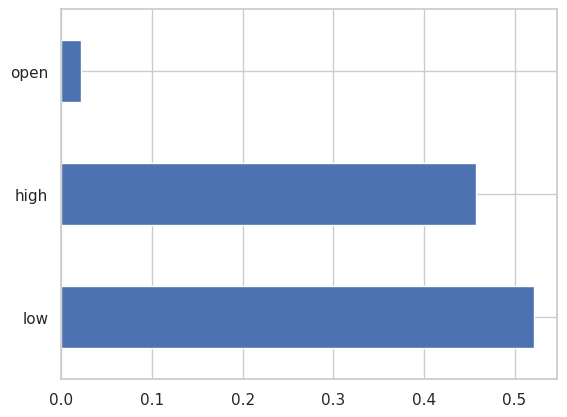

In [37]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000
# Printing all the parameters of Random Forest
print(RegModel)
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

PLOTTING/ VISUALISING THE DECISION TREE IN RANDOM FOREST REGRESSOR

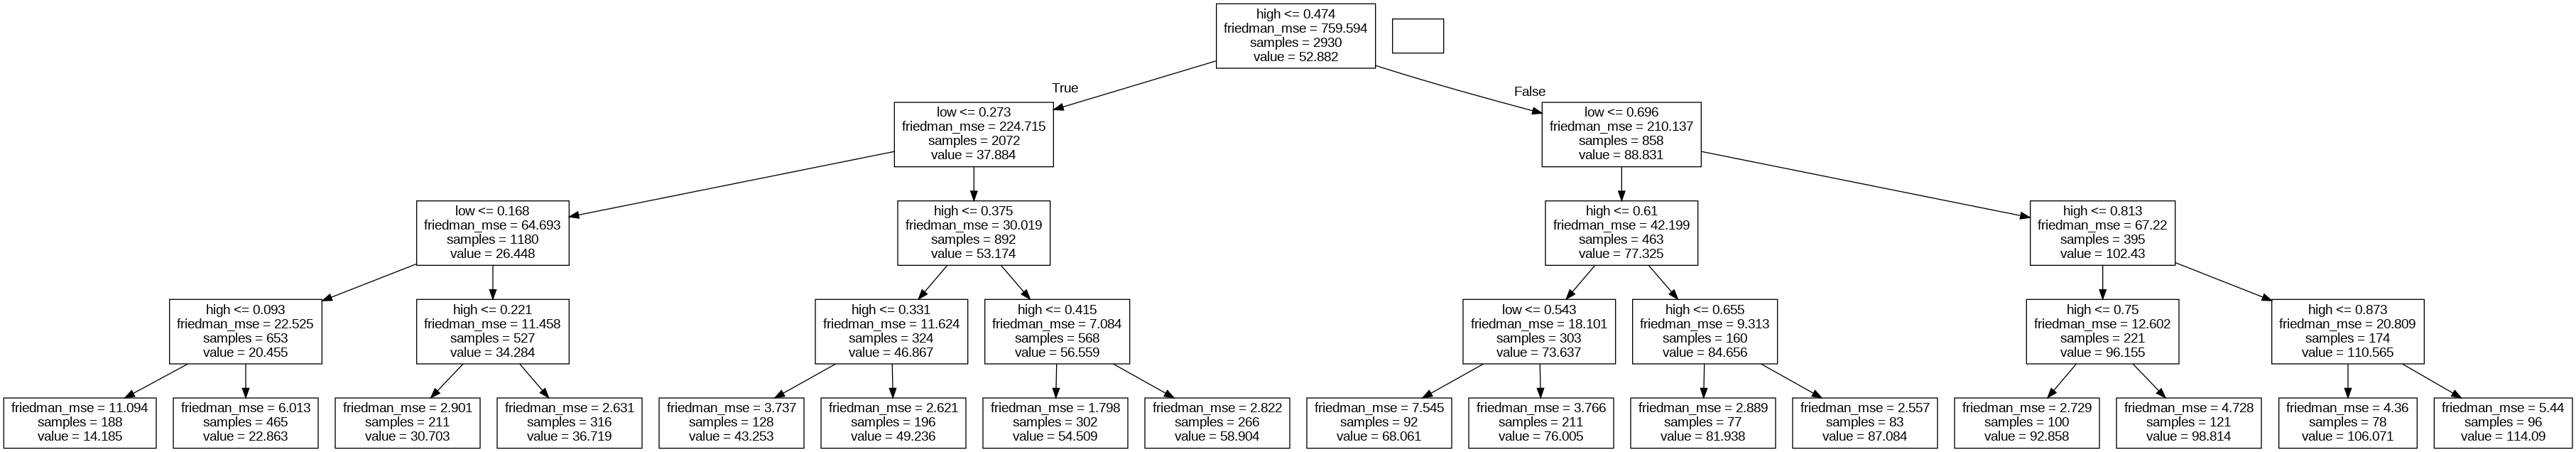

In [38]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

ADABOOST ALGORITHM FOR ML/AL MODEL BUILDING

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9877771473833916

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            45.0
1  0.502530  0.509289  0.509469   68.15            70.0
2  0.119686  0.117801  0.122887   21.78            20.0
3  0.249663  0.251224  0.252144   37.44            34.0
4  0.875843  0.876457  0.870998  110.73           111.0
Mean Accuracy on test data: 92.6234802688235
Median Accuracy on test data: 95.13782380078077

Accuracy values for 10-fold Cross Validation:
 [91.9564876  88.94300475 93.73966237 93.29059263 59.36990021 94.24989871
 96.00504476 94.1782701  96.44650734 97.28888333]

Final Average Accuracy of the model: 90.55


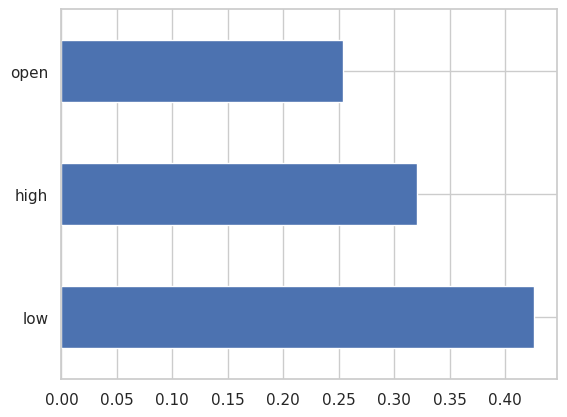

In [39]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBOOST REGRESSOR

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9997516084905209

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15       

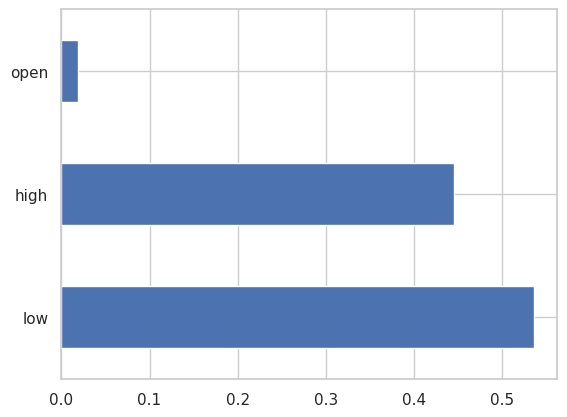

In [40]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

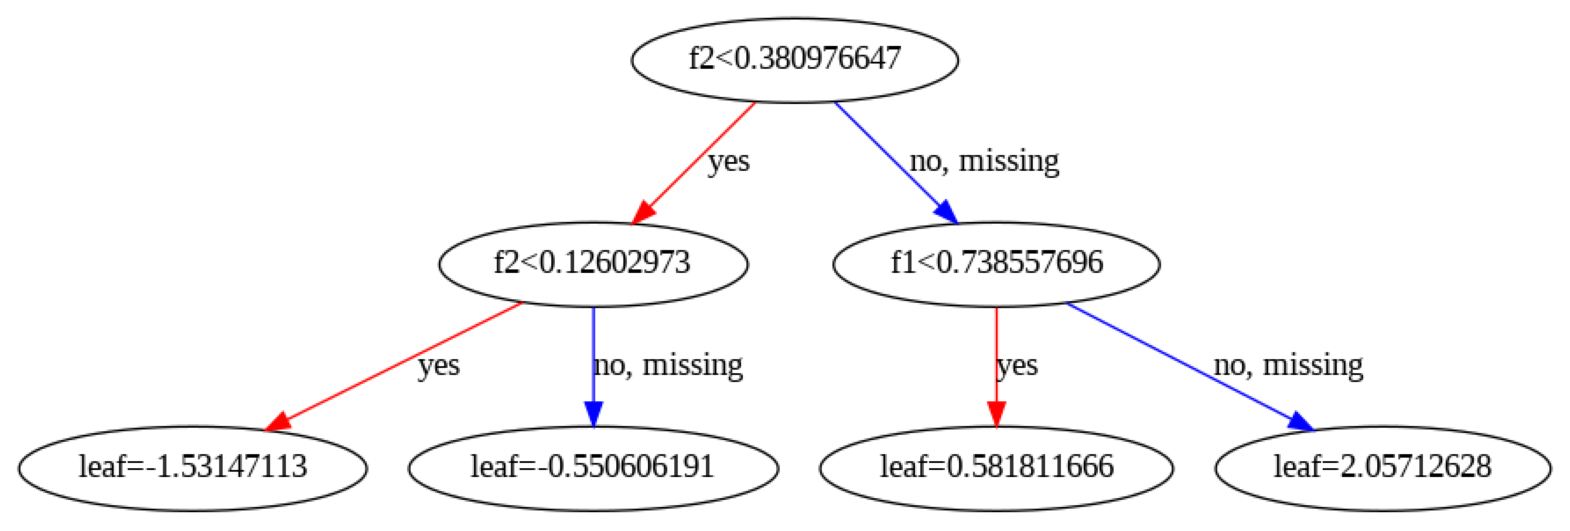

In [41]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

K- NEAREST NEIGHBOR(KNN)

In [42]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9998609278864982

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15            68.0
2  0.119686  0.117801  0.122887   21.78            22.0
3  0.249663  0.251224  0.252144   37.44            37.0
4  0.875843  0.876457  0.870998  110.73           111.0
Mean Accuracy on test data: 99.02887399536004
Median Accuracy on test data: 99.32271645615963

Accuracy values for 10-fold Cross Validation:
 [98.80954457 98.9823128  99.42542392 99.33630428 90.6485264  99.43500815
 99.51848034 99.57394436 99.30822407 99.42950676]

Final Average Accuracy of the model: 98.45


SUPPORT VECTOR MACHINE (SVM) REGRESSOR

In [44]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
# Printing all the parameters
print(RegModel)
# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.999586820190868

##### Model Validation and Accuracy Calculations ##########
       open      high       low   close  Predictedclose
0  0.334683  0.334741  0.337410   47.03            47.0
1  0.502530  0.509289  0.509469   68.15            68.0
2  0.119686  0.117801  0.122887   21.78            22.0
3  0.249663  0.251224  0.252144   37.44            37.0
4  0.875843  0.876457  0.870998  110.73           111.0
Mean Accuracy on test data: 98.89807019653688
Median Accuracy on test data: 99.22542155681806

Accuracy values for 10-fold Cross Validation:
 [98.41533712 98.78445002 99.32055846 99.17180113 98.71769439 99.30429367
 99.43295746 99.50715976 99.34179535 99.33290992]

Final Average Accuracy of the model: 99.13


# MODEL DEPLOYMENT

IN THIS CASE, I CHOOSE SUPPORT VECTOR MACHINE (SVM) REGRESSOR FOR DEPLOYMENT MODEL .

CROSS VALIDATING THE FINAL ACCURACY WITH LESS PREDICTORS

In [52]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [98.41533712 98.78445002 99.32055846 99.17180113 98.71769439 99.30429367
 99.43295746 99.50715976 99.34179535 99.33290992]

Final Average Accuracy of the model: 99.13


In [56]:
final_regressor = RegModel.fit(X,y)

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_regressor_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(final_regressor, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

# CREATE A PYTHON FUNCTION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def split_data(df, test_size):
    TargetVariable = 'close'
    Predictors = ['open', 'high', 'low']
    X = df[Predictors].values
    y = df[TargetVariable].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

def standardize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(X_train_scaled, y_train):
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train_scaled, y_train)
    return svr_model

def predict(model, X_test_scaled):
    return model.predict(X_test_scaled)

def calculate_mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)

def main():
    file_path = input("Enter the file path of the dataset: ")
    test_size = float(input("Enter the test size (e.g., 0.2 for 20%): "))

    df = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(df, test_size)
    X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)
    model = train_model(X_train_scaled, y_train)
    y_pred = predict(model, X_test_scaled)
    mse = calculate_mse(y_test, y_pred)
    print("Mean Squared Error:", mse)

if __name__ == "__main__":
    main()


# INSTALLING THE FLASK LIBRARY

In [74]:
!pip install flask


# GUI PROGRAM

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def browse_file():
    file_path = filedialog.askopenfilename()
    entry_file_path.delete(0, tk.END)
    entry_file_path.insert(0, file_path)

def predict_stock_price():
    try:
        # Get file path and test size from the user input
        file_path = entry_file_path.get()
        test_size = float(entry_test_size.get())

        # Load the dataset
        df = pd.read_csv(file_path)

        # Define the target variable and predictors
        TargetVariable = 'close'
        Predictors = ['open', 'high', 'low']

        # Split the data into training and testing sets
        X = df[Predictors].values
        y = df[TargetVariable].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Standardize the predictors
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train the Support Vector Regression (SVR) model
        svr_model = SVR(kernel='rbf')
        svr_model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = svr_model.predict(X_test_scaled)

        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        messagebox.showinfo("Prediction Result", f"Mean Squared Error: {mse}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create GUI window
root = tk.Tk()
root.title("Stock Price Prediction")

# File Path Entry
label_file_path = tk.Label(root, text="Select CSV File:")
label_file_path.grid(row=0, column=0, padx=10, pady=5)
entry_file_path = tk.Entry(root, width=50)
entry_file_path.grid(row=0, column=1, padx=10, pady=5)
button_browse = tk.Button(root, text="Browse", command=browse_file)
button_browse.grid(row=0, column=2, padx=10, pady=5)

# Test Size Entry
label_test_size = tk.Label(root, text="Enter Test Size (e.g., 0.2 for 20%):")
label_test_size.grid(row=1, column=0, padx=10, pady=5)
entry_test_size = tk.Entry(root, width=10)
entry_test_size.grid(row=1, column=1, padx=10, pady=5)

# Predict Button
button_predict = tk.Button(root, text="Predict", command=predict_stock_price)
button_predict.grid(row=2, column=1, padx=10, pady=5)

root.mainloop()


# LINK TO GITHUB RESPOSITORY

# REFERENCE
Prof. Girija Chetty  (Jee), 'ST1_Assignment_9_Capstone_Project S2 2024'(Lecture, Unit 4483  , University of Canberra, Lecture 9,10,11, Week 10,11,12) https://uclearn.canberra.edu.au/courses/15583/external_tools/197